# 🏠 House Price Regression
Previously, we processed basic linear regression with preprocessed housing data in Lab02.

Today, we will
- 🧠 Train Ridge and Lasso linear regression and Multi-layer Perceptron (MLP) regressor with Scikit-learn.
- ✅ Evaluate model performance and interpret the results.

## Load Previous Lab 02 Codes

In [1]:
# Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load housing dataset
housing = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
housing = pd.get_dummies(housing)

# Preprocessing (fill N/A)
median = housing["total_bedrooms"].median()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median)

# DO NOT use option 1 and 2 simultaneously.
# We will not degrade your submission whatever you use. (The results are different between option 1 and 2.)
# Option 1
# housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

# Option 2
# housing['bedrooms_per_room'] =  housing['total_bedrooms'] / housing['total_rooms']
del housing["total_bedrooms"], housing['total_rooms']

# Scaling
scaler = StandardScaler()
col_list = list(housing)
col_list.remove("median_house_value")
housing_numeric = housing[col_list]
housing_scaled = scaler.fit_transform(housing_numeric)
housing_scaled_df = pd.DataFrame(housing_scaled, index=housing_numeric.index, columns=housing_numeric.columns)

# Training & Test data seperation
housing = pd.concat([housing_scaled_df, housing["median_house_value"]], axis=1)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=45)

# Feature and label seperation of training set
train_set_features = train_set.drop('median_house_value',axis=1)
train_set_target = train_set["median_house_value"].copy()
test_set_features = test_set.drop("median_house_value", axis=1)
test_set_target = test_set["median_house_value"].copy()

print('# of train_set : %.0f, # of test_set : %.0f' % (train_set.shape[0], test_set.shape[0]))

# of train_set : 16512, # of test_set : 4128


## Part 1. Matrices
---
__scikit-learn__ provides R-square, MSE, ...

We will implement these matrices.

- **R² Score**: Measures how well the model explains the variability of the target variable

  $$
  R^2 = 1 - \frac{SS_{res}}{SS_{tot}}
  $$

  - **SS₍res₎** (*Residual Sum of Squares*):  
    The total squared difference between the **actual values** and the **predicted values**.  
    $$
    SS_{res} = \sum (y - \hat{y})^2
    $$

  - **SS₍tot₎** (*Total Sum of Squares*):  
    The total squared difference between the **actual values** and their **mean**.  
    $$
    SS_{tot} = \sum (y - \bar{y})^2
    $$

- **Mean Absolute Percentage Error (MAPE)**:

  $$
  \text{Mean Absolute Percentage Error} = \frac{1}{N} \sum{\frac{|y - \hat{y}|}{y}}
  $$

- **Mean Squared Error (MSE)**:

  $$
  MSE = \frac{1}{N} \sum{(y - \hat{y})^2}
  $$

- **Root Mean Squared Error (RMSE)**:

  $$
  RMSE = \sqrt{\frac{1}{N} \sum{(y - \hat{y})^2}}
  $$

Utilze
- np.sum()
- np.mean()
- np.abs()
- np.sqrt()

Actual, predicted variables type is numpy array.

In [4]:
from re import A
import numpy as np

# Command to hide the warning box
import warnings
warnings.filterwarnings(action='ignore')

actual = np.array([1, 2, 3, 4, 5])
predicted = np.array([1, 1, 4, 2, 6])

def R2(actual, predicted):
    SS_residual =  np.sum((actual-predicted)**2)
    SS_total = np.sum((actual - np.mean(actual))**2)
    return 1-(SS_residual/SS_total)
def MAPE(actual, predicted):
    return np.mean(np.abs(actual-predicted)/actual)

def MSE(actual, predicted):
    return np.mean((actual-predicted)**2)

def RMSE(actual, predicted):
    return np.sqrt(MSE(actual,predicted))

print(R2(actual, predicted))    # 0.3
print(MAPE(actual, predicted))  # 0.3066...
print(MSE(actual, predicted))   # 1.4
print(RMSE(actual, predicted))  # 1.18321595...

0.30000000000000004
0.30666666666666664
1.4
1.1832159566199232


## Part 2. Ridge Regression
---
Based on preprocessed data, Let's make a Ridge Regression (L2) model to predict housing price.

__scikit-learn__ provides *Ridge* function

In [5]:
from sklearn.linear_model import Ridge

# Set training & test data
train_X, train_Y = train_set_features, train_set_target
test_X, test_Y = test_set_features, test_set_target

# Set hyperparameters
alpha = 0

# Ridge regression
model_ridge = Ridge(alpha=alpha)
model_ridge.fit(train_X, train_Y)
print("Train R2 score:", model_ridge.score(train_X, train_Y))

# Ridge R2 score
ridge_predicted = model_ridge.predict(test_X)         # get y_hat
print("Test R2 score :", R2(test_Y, ridge_predicted)) # get r2 score

# Metrices (MAPE, MSE, RMSE)
final_ridge_mape = MAPE(test_Y, ridge_predicted)
final_ridge_mse  = MSE(test_Y, ridge_predicted)
final_ridge_rmse = RMSE(test_Y, ridge_predicted)
print()
print("Final_ridge_MAPE:", final_ridge_mape)
print("Final_ridge_MSE :", final_ridge_mse)
print("Final_ridge_RMSE:", final_ridge_rmse)

Train R2 score: 0.6468218356628419
Test R2 score : 0.6238371423862012

Final_ridge_MAPE: 0.2904330462683851
Final_ridge_MSE : 4991415454.963492
Final_ridge_RMSE: 70649.95014126686


In [12]:
model_ridge.coef_

array([-51850.58231407, -53420.0972336 ,  12739.11931103, -55023.5699061 ,
        58376.84565965,  70476.18163197,  65325.98420896,  41649.54571288,
         4796.57359513,  39913.2134312 ,  45371.07692308])

## Part 3. Lasso Regression
---
Based on preprocessed data, Let's make a Lasso Regression (L1) model to predict housing price.

__scikit-learn__ provides *Lasso* function

In [6]:
from sklearn.linear_model import Lasso

# Set training & test data
train_X, train_Y = train_set_features, train_set_target
test_X, test_Y = test_set_features, test_set_target

# Set hyperparameters
alpha = 0

# Lasso regression
model_lasso = Lasso(alpha=alpha)
model_lasso.fit(train_X, train_Y)
print("Train R2 score:", model_lasso.score(train_X, train_Y))

# Lasso R2 score
lasso_predicted = model_lasso.predict(test_X)         # get y_hat
print("Test R2 score :", R2(test_Y, lasso_predicted)) # get r2 score

# Metrices (MAPE, MSE, RMSE)
final_lasso_mape = MAPE(test_Y, lasso_predicted)
final_lasso_mse  = MSE(test_Y, lasso_predicted)
final_lasso_rmse = RMSE(test_Y, lasso_predicted)
print()
print("Final_lasso_MAPE:", final_lasso_mape)
print("Final_lasso_MSE :", final_lasso_mse)
print("Final_lasso_RMSE:", final_lasso_rmse)


Train R2 score: 0.6468218356628417
Test R2 score : 0.6238371423862012

Final_lasso_MAPE: 0.2904330462683854
Final_lasso_MSE : 4991415454.963492
Final_lasso_RMSE: 70649.95014126686


In [11]:
model_lasso.coef_

array([-51850.58231407, -53420.0972336 ,  12739.11931103, -55023.5699061 ,
        58376.84565965,  70476.18163197,   8571.48691585, -11535.76289067,
         3018.35544787,   4026.50925219,   7097.92016005])

## Part 4. Let's find optimal alpha value of Ridge & Lasso Regression in [1, 1000]
---
Based on preprocessed data, Let's make a Ridge Regression (L2) model to predict housing price.

__scikit-learn__ provides *Ridge* function

In [8]:
from tqdm import tqdm

r2_list   = list()
mape_list = list()
mse_list  = list()
rmse_list = list()
for i in tqdm(range(1, 1000 +1)):
    # Todo: Change the Ridge model to Lasso
    model = Lasso(alpha=i)
    model.fit(train_X, train_Y)

    # R2 score
    predicted = model.predict(test_X)
    r2_list.append(R2(test_Y, predicted))

    # Metrices (MAPE, MSE, RMSE)
    final_mape = MAPE(test_Y, predicted)
    final_mse  = MSE(test_Y, predicted)
    final_rmse = RMSE(test_Y, predicted)
    mape_list.append(final_mape)
    mse_list.append(final_mse)
    rmse_list.append(final_rmse)

100%|██████████| 1000/1000 [00:49<00:00, 20.11it/s]


In [9]:
r2_max   = max(r2_list)
mape_min = min(mape_list)
mse_min  = min(mse_list)
rmse_min = min(rmse_list)

print("Alpha value of biggest R-square score:", r2_list.index(r2_max),     "%.4f" % r2_max)
print("Alpha value of lowest  MAPE     score:", mape_list.index(mape_min), "%.4f" % mape_min)
print("Alpha value of lowest  MSE      score:", mse_list.index(mse_min),   "%.2f" % mse_min)
print("Alpha value of lowest  RMSE     score:", rmse_list.index(rmse_min), "%.2f" % rmse_min)

Alpha value of biggest R-square score: 810 0.6290
Alpha value of lowest  MAPE     score: 843 0.2861
Alpha value of lowest  MSE      score: 810 4922328058.49
Alpha value of lowest  RMSE     score: 810 70159.30


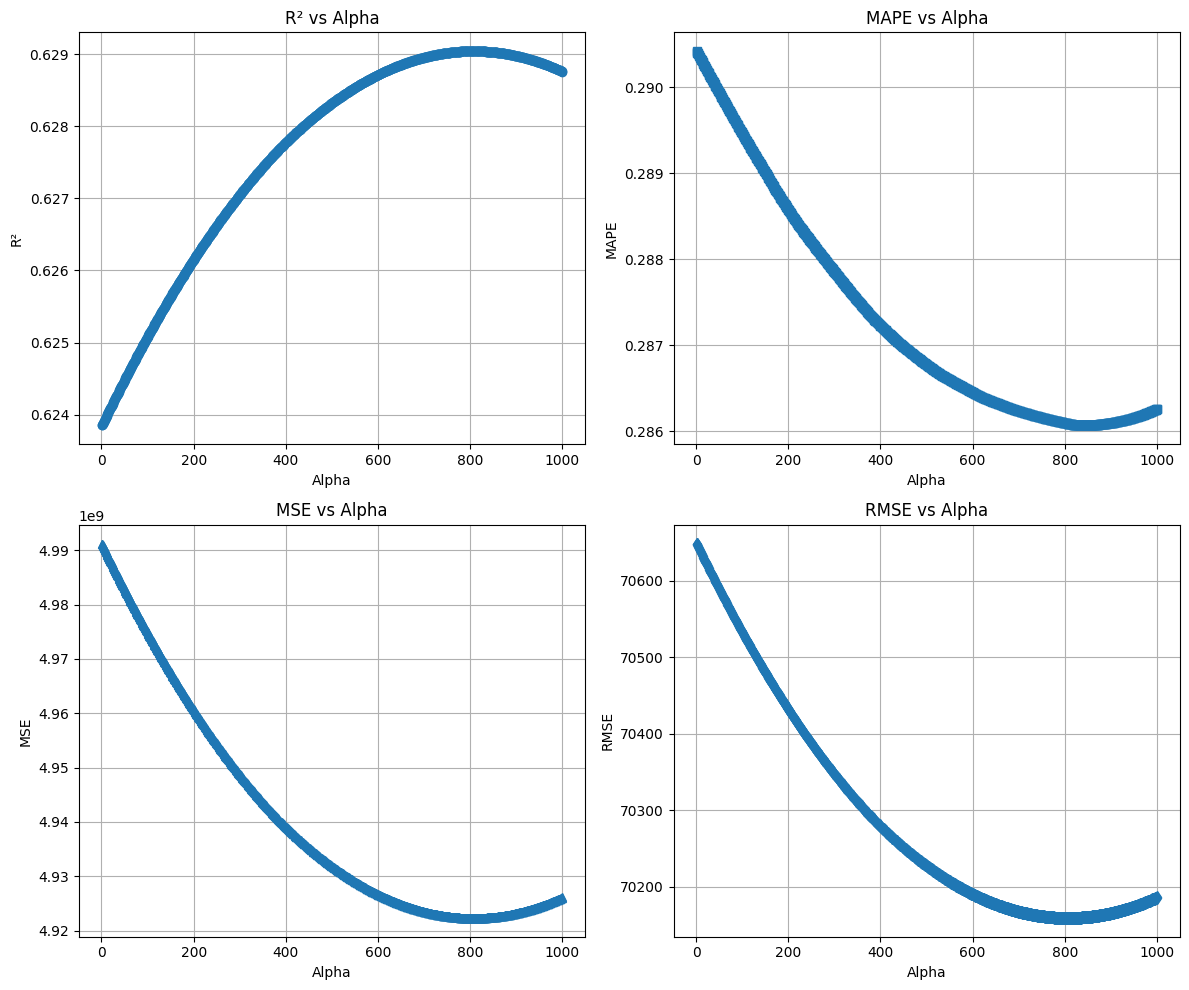

In [10]:
import matplotlib.pyplot as plt

x = [i for i in range(1, 1000 +1)]
plt.figure(figsize=(12, 10))

# R²
plt.subplot(2, 2, 1)
plt.plot(x, r2_list, marker='o')
plt.title('R² vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('R²')
plt.grid(True)

# MAPE
plt.subplot(2, 2, 2)
plt.plot(x, mape_list, marker='s')
plt.title('MAPE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('MAPE')
plt.grid(True)

# MSE
plt.subplot(2, 2, 3)
plt.plot(x, mse_list, marker='^')
plt.title('MSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.grid(True)

# RMSE
plt.subplot(2, 2, 4)
plt.plot(x, rmse_list, marker='d')
plt.title('RMSE vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.grid(True)

plt.tight_layout()
plt.show()

## Part 5. Multi-layer perceptron (MLP) Regressor
---
Using Multi layer perceptron (MLP), let's make a deep learning model to predict housing price more accurately than linear models.

Details about MLP will be coverd later. This is just brief preview.

__scikit-learn__ provides *MLPRegressor* function

In [13]:
from sklearn.neural_network import MLPRegressor

# Set hidden_layer_sizes (32), (64), (64, 32), (32, 64, 32) with max_iter=1000
# MLP regressor
hidden_layer_sizes = (32, 64, 32)
model_MLP = MLPRegressor(
    activation='relu',
    hidden_layer_sizes=hidden_layer_sizes,
    max_iter=1000,
    solver='lbfgs',
    random_state=0
)
model_MLP.fit(train_X, train_Y)
print("Train R2 score : ", model_MLP.score(train_X, train_Y))

MLP_predicted = model_MLP.predict(test_X)
print("Test R2 score : ", R2(test_Y, MLP_predicted))

final_MLP_mape = MAPE(test_Y, MLP_predicted)
final_MLP_mse  = MSE(test_Y, MLP_predicted)
final_MLP_rmse = RMSE(test_Y, MLP_predicted)
print()
print("Final_MLP_MAPE:", final_MLP_mape)
print("Final_MLP_MSE :", final_MLP_mse)
print("Final_MLP_RMSE:", final_MLP_rmse)

Train R2 score :  0.8228908209039061
Test R2 score :  0.7904813090473937

Final_MLP_MAPE: 0.19462062099226207
Final_MLP_MSE : 2780165056.0573473
Final_MLP_RMSE: 52727.27051590427


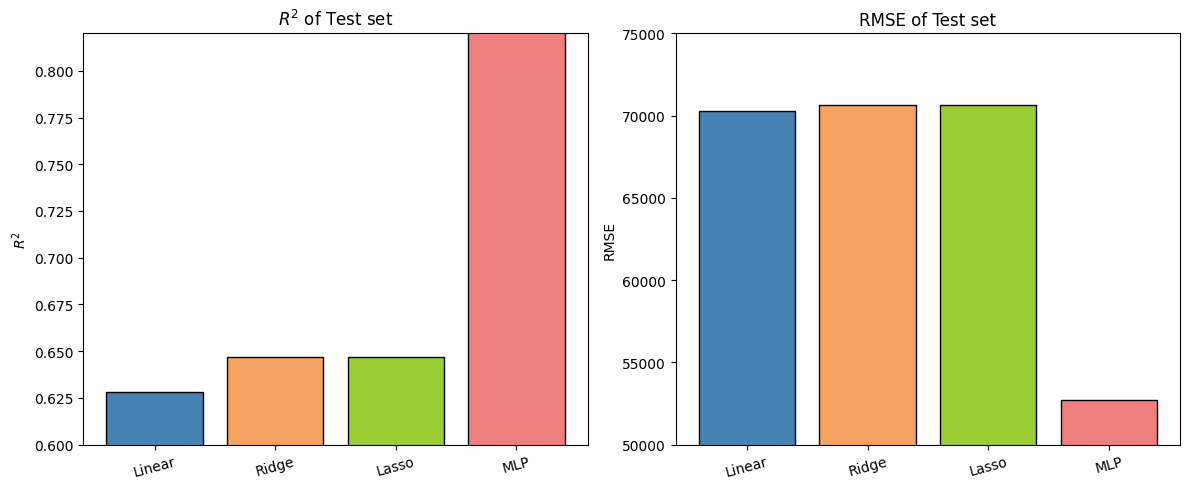

In [14]:
# with Ridge(alpha=100)
# with Lasso(alpha=1000)
data = {
    'Model': ['Linear', 'Ridge', 'Lasso', 'MLP'],
    'R2': [0.6280, 0.6468218356628419,0.6468218356628417,0.8228908209039061],
    'RMSE': [70258.86, 70649.95014126686, 70649.95014126686, 52727.27051590427]
}
df = pd.DataFrame(data)

# R^2 plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].bar(df['Model'], df['R2'], color=['steelblue', 'sandybrown', 'yellowgreen', 'lightcoral'], edgecolor=['black'] * 4)
axs[0].set_title('$R^2$ of Test set')
axs[0].set_ylabel('$R^2$')
axs[0].set_ylim(0.6, 0.82)
axs[0].tick_params(axis='x', rotation=15)

# RMSE plot
axs[1].bar(df['Model'], df['RMSE'], color=['steelblue', 'sandybrown', 'yellowgreen', 'lightcoral'], edgecolor=['black'] * 4)
axs[1].set_title('RMSE of Test set')
axs[1].set_ylabel('RMSE')
axs[1].set_ylim(50000, 75000)
axs[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

# Answer these 4 questions below.
    Example: (Yes or No), (the reason why in one sentence.)

Q1. Is MSE a good metric for interpreting error in housing prices?

  Your answer: No because it is not intuitive (squared unt)

Q2. If alpha is 0, will the results (Ridge and Lasso) be the same as linear regression?

  Your answer: Yes because penalty terms will disappear

Q3. In Lasso Regression, what was the alpha value (1 ~ 1000) that resulted in the optimal RMSE?

  Your answer: 810 70159.30

Q4. MLP has a lower error than Linear Regression methods. Does that mean MLP is always a better model than Linear, Ridge, and Lasso Regression?

  Your answer: No because MLP is slower to train, needs larger data and easily overfits